# Сегментация клиентов: кластеризация
Ссылка на данные:
* https://www.kaggle.com/datasets/vishakhdapat/customer-segmentation-clustering

### О наборе данных.
Анализ личности клиента включает в себя тщательное изучение оптимальных профилей клиентов компании. Этот анализ способствует более глубокому пониманию клиентов, позволяя предприятиям адаптировать продукты для удовлетворения различных потребностей, поведения и проблем различных типов клиентов.

Проводя анализ личности клиента, компании могут совершенствовать свои продукты с учетом предпочтений конкретных сегментов клиентов. Вместо того, чтобы выделять ресурсы для продвижения нового продукта по всей клиентской базе данных, компании могут определить сегменты, которые, скорее всего, будут заинтересованы в продукте. Впоследствии целевые маркетинговые усилия могут быть направлены на эти конкретные сегменты, оптимизируя использование ресурсов и повышая вероятность успешного внедрения продукта.

Подробная информация о функциях приведена ниже:

* ID: уникальный идентификатор для каждого человека в наборе данных.
* Year_Birth: год рождения человека.
* Education: Высший уровень образования, достигнутый человеком.
* Marital_Status: Семейное положение человека.
* Income: Годовой доход человека.
* Kidhome: количество маленьких детей в семье.
* Teenhome: количество подростков в семье.
* Dt_Customer: дата, когда клиент был впервые зарегистрирован или стал частью базы данных компании.
* Recency: количество дней с момента последней покупки или взаимодействия.
* MntWines: Сумма, потраченная на вино.
* MntFruits: Сумма, потраченная на фрукты.
* MntMeatProducts: сумма, потраченная на мясные продукты.
* MntFishProducts: сумма, потраченная на рыбные продукты.
* MntSweetProducts: сумма, потраченная на сладкие продукты.
* MntGoldProds: сумма, потраченная на золотые изделия.
* NumDealsPurchases: количество покупок, совершенных со скидкой или в рамках сделки.
* NumWebPurchases: количество покупок, совершенных через веб-сайт компании.
* NumCatalogPurchases: количество покупок, совершенных по каталогам.
* NumStorePurchases: количество покупок, совершенных в обычных магазинах.
* NumWebVisitsMonth: количество посещений веб-сайта компании за месяц.
* AcceptedCmp3: двоичный индикатор (1 или 0), принял ли человек третью маркетинговую кампанию.
* AcceptedCmp4: двоичный индикатор (1 или 0), принял ли человек четвертую маркетинговую кампанию.
* AcceptedCmp5: двоичный индикатор (1 или 0), принял ли человек пятую маркетинговую кампанию.
* AcceptedCmp1: двоичный индикатор (1 или 0), принял ли человек первую маркетинговую кампанию.
* AcceptedCmp2: двоичный индикатор (1 или 0), принял ли человек вторую маркетинговую кампанию.
* Complain: двоичный индикатор (1 или 0), подал ли человек жалобу.
* Z_CostContact: постоянная стоимость связи с клиентом.
* Z_Revenue: постоянный доход, связанный с успешным ответом кампании.
* Response: бинарный индикатор (1 или 0), отреагировал ли человек на маркетинговую кампанию.

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("dark_background")
# plt.style.use('seaborn-v0_8-white')
pd.options.display.max_rows = 50
pd.options.display.max_columns = 120
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Читаем данные
df = pd.read_csv('.\Clustering_Problems\Problem_1\customer_segmentation.csv', parse_dates = ['Dt_Customer'])

In [3]:
# Посмотрим на первые 5 строк исходных данных, а так же на наличие пропусков в данных
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [5]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


#### Видим, что:
* есть пропуски в столбце Income
* есть лишние столбцы
* некоторые характеристики требуется перекодировать в числовые значения

In [6]:
# Посмотрим на кол-во уникальных значений в каждом столбце
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

#### Удалим ненужные столбцы

In [7]:
# Столбец ID не несет полезной информации, также в столбцах Z_CostContact и Z_Revenue всего одно уникальное значение, поэтому удалим эти столбцы
df_work = df.copy()
df_work.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis = 1, inplace = True)

In [8]:
df_work.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


#### Заменим тесковые обозначения на числовые

In [9]:
# Посмотрим на значения в солбце Education
df_work['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [10]:
# Посмотрим на значения в солбце Marital_Status
df_work['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [11]:
# Создадим переменные в качестве словаря для замены текстовых значений на числовые
edu = {'Graduation': 1, 'PhD': 2, 'Master': 3, '2n Cycle': 4, 'Basic': 5}
status = {'Married': 1, 'Together': 2, 'Single': 3, 'Divorced': 4, 'Widow': 5, 'Alone': 6, 'Absurd': 7, 'YOLO': 8}
# Проведем замену
df_work['Education'] = df_work['Education'].replace(edu)
df_work['Marital_Status'] = df_work['Marital_Status'].replace(status)

In [12]:
df_work.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,1,3,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,1,3,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,1,2,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,1,2,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,2,1,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


#### Преобразуем в столбце Dt_Customer дату регистрации на кол-во дней с момента регистрации

In [13]:
df_work['Dt_Customer'] = df_work['Dt_Customer'].rsub(pd.Timestamp('today')).dt.days

#### Заполним пропуски в столбце Income на медианный годовой доход

In [14]:
# Посмотрим на кол-во пропусков в столбце
df_work['Income'].isna().sum()

24

In [15]:
# Заполним пропуски медианным значением
df_work['Income'] = df_work['Income'].fillna(df_work['Income'].median())

# Кластеризация

In [16]:
# Импортируем необходимые библиотеки
from sklearn import preprocessing # стандартизация
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster # иерархический кластерный анализ

In [17]:
# Выбираем стандартизацию
norm = preprocessing.StandardScaler()
# norm = preprocessing.MaxAbsScaler()
# norm = preprocessing.MinMaxScaler()

In [18]:
# Вычисляем параметры стандартизации
norm.fit(df_work)

StandardScaler()

In [19]:
# Преобразуем данные
X = norm.transform(df_work)

In [20]:
# Преобразуем полученный массив данных в объект pandas
X = pd.DataFrame(X, index = df_work.index, columns = df_work.columns)
X.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,-0.985345,-0.822041,0.721238,0.235696,-0.825218,-0.929894,1.976745,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,1.409304,2.510890,-0.550785,0.693904,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,2.388846
1,-1.235733,-0.822041,0.721238,-0.235454,1.032559,0.906934,-1.667011,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612
2,-0.317643,-0.822041,-0.131307,0.773999,-0.825218,-0.929894,-0.172468,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,-0.685887,1.409304,-0.226541,1.295237,-0.542647,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612
3,1.268149,-0.822041,-0.131307,-1.022355,1.032559,-0.929894,-1.925433,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,-0.168236,-0.750450,-0.910898,-0.550785,0.281720,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612
4,1.017761,0.075751,-0.983852,0.241888,1.032559,-0.929894,-0.822831,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,1.384715,0.329427,0.115638,0.064556,-0.130463,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282,-0.418612


## Метод иерархического кластерного анализа

In [21]:
# Кластеризуем

link = linkage(X, method = 'ward', metric = 'euclidean')

# method = 'single' - метод ближайшего соседа
# method = 'complete' - метод дальнего соседа
# method = 'average' - метод невзвешенных парных групп со средним арифметическим (UPGMA)
# method = 'weighted' -  метод взвешенных парных групп со средним арифметическим (WPGMA)
# method = 'centroid' - метод невзвешенных парных групп с центроидами (UPGMC)
# method = 'median' - метод взвешенных парных групп с медоидами (WPGMC)
# method = 'ward' - метод Уорда

# metrics:
# braycurtis, canberra, chebyshev, cityblock,
# correlation, cosine, dice, euclidean, hamming,
# jaccard, jensenshannon, kulczynski1, mahalanobis,
# matching, minkowski, rogerstanimoto, russellrao,
# seuclidean, sokalmichener, sokalsneath, sqeuclidean, yule

Text(0, 0.5, 'РАССТОЯНИЕ ОБЪЕДИНЕНИЯ')

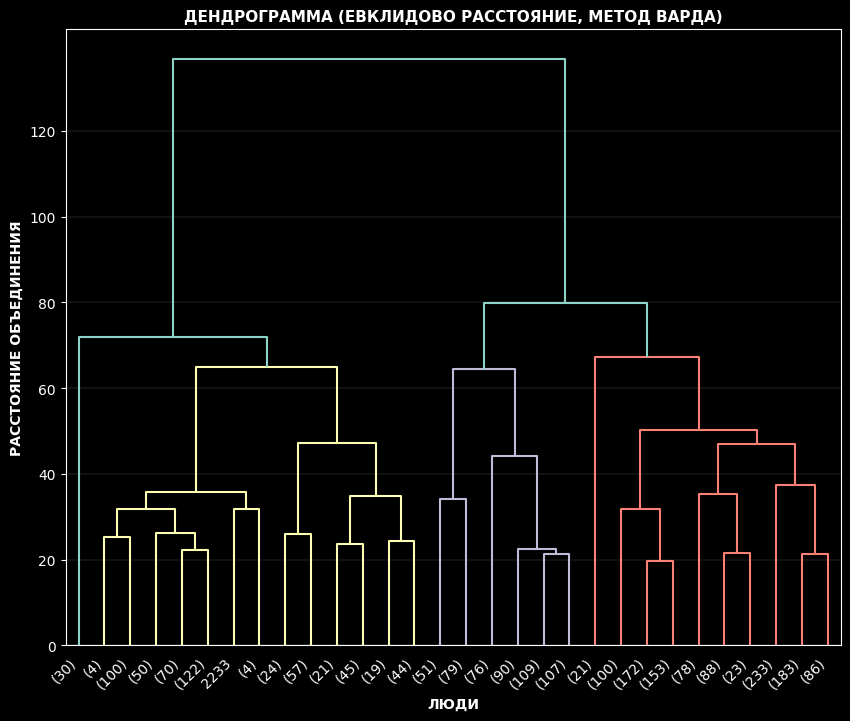

In [42]:
# Строим дендрограмму
fig, ax = plt.subplots(figsize = (10, 8))
ax.set(ylim = (0, 140), yticks = np.arange(0, 140, 20))
ax.set_xticklabels(labels = 'x', rotation = 45, ha = 'right')
ax.grid(axis = 'y', color = 'white', linestyle = '-', linewidth = 0.1)
dn = dendrogram(link,
                labels = X.index.tolist(),
                color_threshold = 70,               # - указываем где разграничить по цветам (-1 не раскрашивать)
                truncate_mode = 'lastp')            # - более красивая визуализация слишком ветвистых кластеров
ax.set_title('ДЕНДРОГРАММА (ЕВКЛИДОВО РАССТОЯНИЕ, МЕТОД ВАРДА)', fontsize = 11, fontweight = 800)
ax.set_xlabel('ЛЮДИ', fontsize = 10, fontweight = 800)
ax.set_ylabel('РАССТОЯНИЕ ОБЪЕДИНЕНИЯ', fontsize = 10, fontweight = 800)

#### Видим 3 больших кластера и один маленький (график раскрашен после анализа)

In [23]:
# Добавим столбец cluster с номерами кластеров в исходную таблицу и укажем когда прекратить объединение

# Вариант 1: указываем по расстоянию, которое определяем по дендрограмме
# df['cluster_hierarchy'] = fcluster(link, 70, criterion = 'distance')

# Вариант 2: указываем максимальное кол-во кластеров
df['cluster_hierarchy'] = fcluster(link, 4, criterion = 'maxclust')

In [24]:
# Посмотрим сколько элементов в каждом кластере
df['cluster_hierarchy'].value_counts()

4    1137
2     561
3     512
1      30
Name: cluster_hierarchy, dtype: int64

In [25]:
# Посмотрим чем отличаются кластеры по среднему значению
df.groupby('cluster_hierarchy').mean().round(2).sort_values(by = 'Income', ascending = False)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
cluster_hierarchy,,,,,,,,,,,,,,,,,,,,,,,,,,
2,5708.77,1967.93,75946.10,0.04,0.23,48.86,583.53,68.28,444.96,97.29,69.23,78.32,1.51,5.38,5.69,8.37,2.98,0.04,0.12,0.25,0.23,0.0,0.00,3.0,11.0,0.27
1,5172.57,1968.13,71054.83,0.07,0.43,48.67,898.67,22.97,250.30,38.73,30.60,66.40,1.70,4.90,5.17,8.17,5.17,0.23,0.73,0.57,0.43,1.0,0.00,3.0,11.0,0.67
3,5469.45,1966.38,56934.81,0.25,0.81,49.79,461.53,23.24,141.14,31.17,23.08,57.91,2.92,5.83,3.35,7.30,5.67,0.25,0.15,0.01,0.00,0.0,0.00,3.0,11.0,0.15
4,5600.95,1970.35,37929.03,0.74,0.51,48.94,79.32,7.06,39.20,10.87,7.96,20.25,2.48,2.64,0.79,3.77,6.31,0.00,0.00,0.00,0.00,0.0,0.02,3.0,11.0,0.07


In [26]:
# Посмотрим чем отличаются кластеры по медиане
df.groupby('cluster_hierarchy').median().sort_values(by = 'Income', ascending = False)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
cluster_hierarchy,,,,,,,,,,,,,,,,,,,,,,,,,,
2,5547.0,1969.0,75697.5,0.0,0.0,50.0,532.0,57.0,415.0,85.0,54.0,56.0,1.0,5.0,5.0,8.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
1,3622.5,1968.5,70896.5,0.0,0.0,52.5,1044.5,15.0,136.5,27.5,15.5,46.0,1.0,5.0,4.5,8.0,5.5,0.0,1.0,1.0,0.0,1.0,0.0,3.0,11.0,1.0
3,5398.0,1967.0,59304.0,0.0,1.0,52.0,437.0,13.0,112.0,16.0,11.0,38.0,2.0,6.0,3.0,7.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
4,5474.0,1972.0,37085.0,1.0,0.0,49.0,29.0,3.0,18.0,4.0,3.0,11.0,2.0,2.0,1.0,3.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0


In [27]:
# * ID: уникальный идентификатор для каждого человека в наборе данных.
# * Year_Birth: год рождения человека.
# * Education: Высший уровень образования, достигнутый человеком.
# * Marital_Status: Семейное положение человека.
# * Income: Годовой доход человека.
# * Kidhome: количество маленьких детей в семье.
# * Teenhome: количество подростков в семье.
# * Dt_Customer: дата, когда клиент был впервые зарегистрирован или стал частью базы данных компании.
# * Recency: количество дней с момента последней покупки или взаимодействия.
# * MntWines: Сумма, потраченная на вино.
# * MntFruits: Сумма, потраченная на фрукты.
# * MntMeatProducts: сумма, потраченная на мясные продукты.
# * MntFishProducts: сумма, потраченная на рыбные продукты.
# * MntSweetProducts: сумма, потраченная на сладкие продукты.
# * MntGoldProds: сумма, потраченная на золотые изделия.
# * NumDealsPurchases: количество покупок, совершенных со скидкой или в рамках сделки.
# * NumWebPurchases: количество покупок, совершенных через веб-сайт компании.
# * NumCatalogPurchases: количество покупок, совершенных по каталогам.
# * NumStorePurchases: количество покупок, совершенных в обычных магазинах.
# * NumWebVisitsMonth: количество посещений веб-сайта компании за месяц.
# * AcceptedCmp3: двоичный индикатор (1 или 0), принял ли человек третью маркетинговую кампанию.
# * AcceptedCmp4: двоичный индикатор (1 или 0), принял ли человек четвертую маркетинговую кампанию.
# * AcceptedCmp5: двоичный индикатор (1 или 0), принял ли человек пятую маркетинговую кампанию.
# * AcceptedCmp1: двоичный индикатор (1 или 0), принял ли человек первую маркетинговую кампанию.
# * AcceptedCmp2: двоичный индикатор (1 или 0), принял ли человек вторую маркетинговую кампанию.
# * Complain: двоичный индикатор (1 или 0), подал ли человек жалобу.
# * Z_CostContact: постоянная стоимость связи с клиентом.
# * Z_Revenue: постоянный доход, связанный с успешным ответом кампании.
# * Response: бинарный индикатор (1 или 0), отреагировал ли человек на маркетинговую кампанию.

#### Интерпретация
* Выделилось 4 класса пользователей (можно сказать 3, но с подклассом)
    - богатые  - кластер 2 (есть подкласс: употребляющие много вина - кластер 1)
    - средний класс - кластер 3
    - бедные - кластер 4
* Среди наших клиентов бедных людей в 2 раза больше, чем богатых и среднего класса. Богатые и средний класс в равных пропорциях.
* У людей с высоким достатком практически нет маленьких детей, у немногих из них есть дети подростки
* У людей со средним достатком больше всего детей подростков, у четверти из них есть маленькие дети
* У бедных людей больше всего маленьких детей, у половины из них есть дети подростки (в этой категории чаще всего встречаются семьи с 2-мя детьми)
* Потребление товаров разных категорий сообразно доходам, то есть чем больше доход, тем больше потребление каждого вида товара, здесь аномалий не обнаружено. Кроме подкласса богатых, которые употребляют много вина (их всего 30 человек).
* Предпочтения по месту покупки
    - Богатые люди:
        * 1-е место магазины
        * 2-е место каталоги
        * 3-место веб-сайт
    - Средний класс:
        * 1-е место магазины
        * 2-е место веб-сайт
        * 3-место каталоги
    - Бедные люди:
        * 1-е место магазины
        * 2-е место веб-сайт
        * Каталогами практически не пользуются
* В целом основные продажи идут через магазины.
* Больше всего сайт посещают бедные люди и средний класс (здесь же и подкласс любителей вина), богатые люди - в меньшей степени.
* В основном на маркетинговые компании откликаются богатые люди, а у любителей вина самый большой процент среди всех пользователей (выделил их в отдельный кластер, так как только они откликнулись на 2-ую маркетинговую компанию, да еще и все 30 человек). На втором месте идет средний класс. Бедные люди вообще не откликаются на маркетинговые компании.
* Жалоб практически нет (совсем небольшой процент среди бедных людей)

In [28]:
# Какие индексы попали в 1-й кластер?
# df.query('cluster_hierarchy == 1').index.values

## Кластерный анализ методом KMeans

In [ ]:
# Импортируем библиотеки
from sklearn.cluster import KMeans

Text(0, 0.5, 'СУММА КВАДРАТОВ РАССТОЯНИЙ')

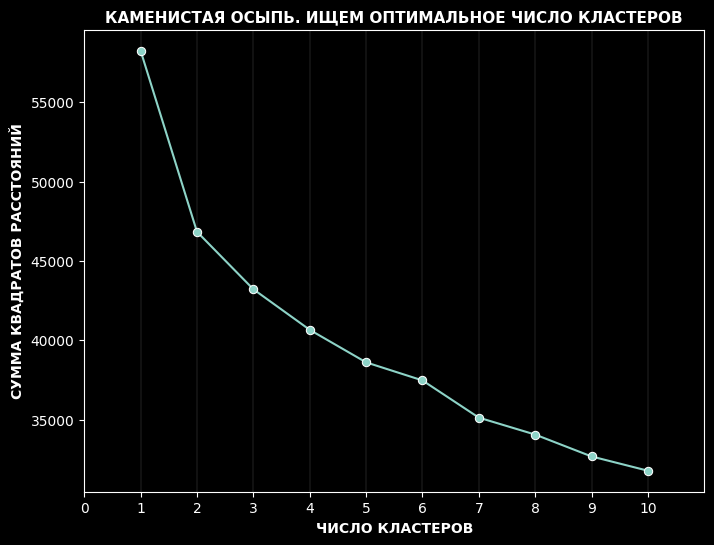

In [29]:
# Определяем кол-во кластеров методом локтя
K = range(1, 11) # задаем дипазон предполагаемых кластеров

# Вычисляем значения критерия качества для разного числа кластеров
models = [KMeans(n_clusters = k, random_state = 42).fit(X) for k in K]  # Переменную X мы завели ранее при стандартизации данных
dist = [model.inertia_ for model in models]

# Строим график
fig, ax = plt.subplots(figsize = (8, 6))
ax.set(xlim = (0, 11), xticks = np.arange(0, 11, 1))
ax.grid(axis = 'x', color = 'white', linestyle = '-', linewidth = 0.1)
sns.lineplot(x = K, y = dist, marker = 'o')
ax.set_title('КАМЕНИСТАЯ ОСЫПЬ. ИЩЕМ ОПТИМАЛЬНОЕ ЧИСЛО КЛАСТЕРОВ', fontsize = 11, fontweight = 800)
ax.set_xlabel('ЧИСЛО КЛАСТЕРОВ', fontsize = 10, fontweight = 800)
ax.set_ylabel('СУММА КВАДРАТОВ РАССТОЯНИЙ', fontsize = 10, fontweight = 800)

#### Вывод: число кластеров 3

In [138]:
# Задаем максимальное число итераций
max_iter_1 = 300

# Инициализируем модель
model = KMeans(n_clusters = 3,           # вводим выбранное кол-во кластеров
               init = 'k-means++',       # выбираем способ подбора начальных центров кластеров
               random_state = 42,
               max_iter = max_iter_1,
               n_init = 'auto',
               verbose = 0,              # значение 0 позволяет не выводить промежуточные результаты
               tol = 0.0001)             # пороговое значение изменения W при котором стоит остановить итерации

In [140]:
# Начинаем кластеризацию
model.fit(X)

# Проверяем сошелся ли алгоритм
if model.n_iter_ == max_iter_1:
    print(f'Не сошлось за {model.n_iter_} итераций')
else:
    print(f'Сошлось за {model.n_iter_} итераций')

Сошлось за 7 итераций


In [34]:
# Посмотрим на номера получившихся кластеров
# model.labels_

In [35]:
# Координаты центров кластеров
# model.cluster_centers_

In [36]:
# Добавим столбец cluster с номерами кластеров в исходную таблицу и укажем когда прекратить объединение
df['cluster_kmeans'] = model.labels_

In [37]:
# Посмотрим сколько элементов в каждом кластере
df['cluster_kmeans'].value_counts()

0    1051
2     642
1     547
Name: cluster_kmeans, dtype: int64

In [38]:
# Посмотрим чем отличаются кластеры по среднему значению
df.groupby('cluster_kmeans').mean().round(2).sort_values(by = 'Income', ascending = False)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,cluster_hierarchy
cluster_kmeans,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,5707.12,1968.67,77884.96,0.04,0.14,49.52,612.97,68.47,471.23,100.47,70.22,77.21,1.23,5.04,6.10,8.31,2.74,0.08,0.13,0.28,0.23,0.03,0.00,3.0,11.0,0.31,2.07
2,5463.28,1964.50,58398.38,0.21,0.91,48.41,467.43,25.18,141.71,33.70,26.28,62.55,3.65,6.46,3.14,7.84,5.67,0.06,0.14,0.01,0.03,0.01,0.01,3.0,11.0,0.11,3.10
0,5611.05,1971.51,35095.09,0.80,0.45,49.33,43.23,5.04,24.00,7.10,5.08,15.43,2.09,2.14,0.58,3.22,6.44,0.07,0.01,0.00,0.00,0.00,0.01,3.0,11.0,0.09,3.91


In [39]:
# Посмотрим чем отличаются кластеры по медиане
df.groupby('cluster_kmeans').median().sort_values(by = 'Income', ascending = False)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,cluster_hierarchy
cluster_kmeans,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,5538.0,1970.0,77226.0,0.0,0.0,52.0,561.0,54.0,431.0,93.0,57.0,56.0,1.0,5.0,6.0,8.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,2.0
2,5306.5,1965.0,58688.0,0.0,1.0,49.5,399.5,14.5,119.5,19.0,14.0,42.0,3.0,6.0,3.0,8.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,3.0
0,5493.0,1973.0,34600.0,1.0,0.0,49.0,22.0,2.0,15.0,3.0,2.0,10.0,2.0,2.0,0.0,3.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,4.0


In [40]:
# Выведем таблицу сопряженностей для сравнения двух методов кластеризации
table = pd.crosstab(df['cluster_hierarchy'], df['cluster_kmeans'])
table

cluster_kmeans,0,1,2
cluster_hierarchy,,,
1,2,19,9
2,1,478,82
3,85,42,385
4,963,8,166


## Кластерный анализ методом DBSCAN

In [134]:
# Импортируем библиотеки
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [135]:
# Инициализируем модель со значениями по умолчанию
db_scan_1 = DBSCAN().fit(X)

In [136]:
# Смотрим как прошла кластеризация
pd.Series(db_scan_1.labels_).value_counts()

-1    2240
dtype: int64

#### Все значения попали в выбросы - изменим параметры кластеризации

In [164]:
# Инициализируем модель и подбираем значения до тех пор, пока нас не устроит результат кластеризации
db_scan_2 = DBSCAN(eps = 2.8,                 # радиус сферы
                   min_samples = 15,          # мин. кол-во элементов в сфере
                   metric = 'euclidean',
                   algorithm = 'brute').fit(X)

# Смотрим как прошла кластеризация
pd.Series(db_scan_2.labels_).value_counts()

 0    1184
-1     990
 1      50
 2      16
dtype: int64

#### Проведено несколько итераций подбора параметров, но во всех случаях очень много выбросов, видимо данный метод кластеризации не подходит для наших данных.